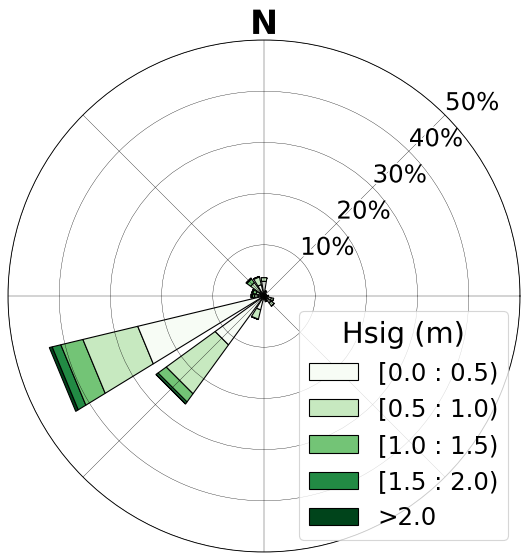

In [4]:
#import libraries 
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from matplotlib import patheffects

# Load data
data = pd.read_csv('SAWaves_Brighton_010921_250123_refined.csv')

# Create wave height (ws) and direction (wd) variables
ws = data['Hsigm'].values.astype(float) 
wd = data['Dpdeg'].values.astype(float) 

# setting wave height bins, colour, and other plot settings.
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, bins=np.arange(0, 2.5, 0.5), cmap=cm.Greens, edgecolor='black', linewidth=1, normed=True)

# Define the formatter function (percent label)
def percentage(x, pos):
    return '{:.0f}%'.format(x * 1)

# Apply the formatter function to both x and y axes and adjust font size
ax.yaxis.set_major_formatter(ticker.FuncFormatter(percentage))
ax.yaxis.set_tick_params(labelsize=24)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(percentage))
ax.xaxis.set_tick_params(labelsize=24)
ax.grid(color='k', linewidth=0.3)

#%labels
theLabels = ['', '10%', '20%', '30%', '40%', '50%']
ax.set_rgrids(np.arange(0, 60, 10), angle=0, labels=theLabels, fontsize=22)
ax.set_rlabel_position(45)

# Set the font size of the legend labels and position  
legend = ax.legend(title='Hsig (m)', loc='lower right', fontsize='22')
legend.get_title().set_fontsize(26)
for label in legend.get_lines():
    label.set_linewidth(2.0)
    
# Apply white halo effect to x and y axis labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_path_effects([patheffects.withStroke(linewidth=3, foreground="w")])

# Apply white halo effect to the legend title and labels
for label in (legend.get_lines() + [legend.get_title()]):
    label.set_path_effects([patheffects.withStroke(linewidth=3, foreground="w")])

#set NSEW labels
ax.set_xticklabels([ '', '', 'N', '', '', '', '', ''], fontweight='bold', fontsize=30)

#plot and save the figure
plt.savefig('marcios_cat.png', transparent=True)
